## Analyzing corn yield and crop progress data from IOWA (county level)

In [57]:
import os
import sys
os.chdir(os.path.expanduser('~/Documents/wofost/'))
src_dir = os.getcwd() + '/src/wofost'
data_dir = os.getcwd() + '/data/'
data_dir

import numpy as np
import rasterio as rio
import geopandas as gpd

import seaborn as sns
import earthpy.plot as ep
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="white")

US and IOWA county map (shapefiles)

In [61]:
us_county = gpd.read_file(data_dir+'/maps/cb_2018_us_county_500k.shp')
iowa_county = us_county.query('STATEFP == "19"')
iowa_county

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
97,19,175,00465276,0500000US19175,19175,Union,06,1097235806,5575853,"POLYGON ((-94.47101 41.04705, -94.47075 41.057..."
148,19,001,00465190,0500000US19001,19001,Adair,06,1474404193,2597996,"POLYGON ((-94.70072 41.46725, -94.70057 41.482..."
149,19,045,00465211,0500000US19045,19045,Clinton,06,1799818638,39526958,"POLYGON ((-90.89894 41.91853, -90.89807 41.920..."
150,19,083,00465230,0500000US19083,19083,Hardin,06,1474505075,1776735,"POLYGON ((-93.49948 42.55770, -93.48076 42.557..."
151,19,111,00465244,0500000US19111,19111,Lee,06,1340448548,55266733,"POLYGON ((-91.71879 40.81354, -91.68010 40.813..."
...,...,...,...,...,...,...,...,...,...,...
2986,19,031,00465205,0500000US19031,19031,Cedar,06,1500798762,6385832,"POLYGON ((-91.36642 41.61678, -91.36639 41.656..."
3006,19,085,00465231,0500000US19085,19085,Harrison,06,1804814772,12411273,"POLYGON ((-96.13750 41.86631, -96.05962 41.864..."
3031,19,069,00465223,0500000US19069,19069,Franklin,06,1507301086,1428932,"POLYGON ((-93.49954 42.60851, -93.49944 42.613..."
3077,19,129,00465253,0500000US19129,19129,Mills,06,1132950332,8306493,"POLYGON ((-95.88347 41.15493, -95.88129 41.159..."


Text(0.5, 1.0, 'IOWA COUNTIES')

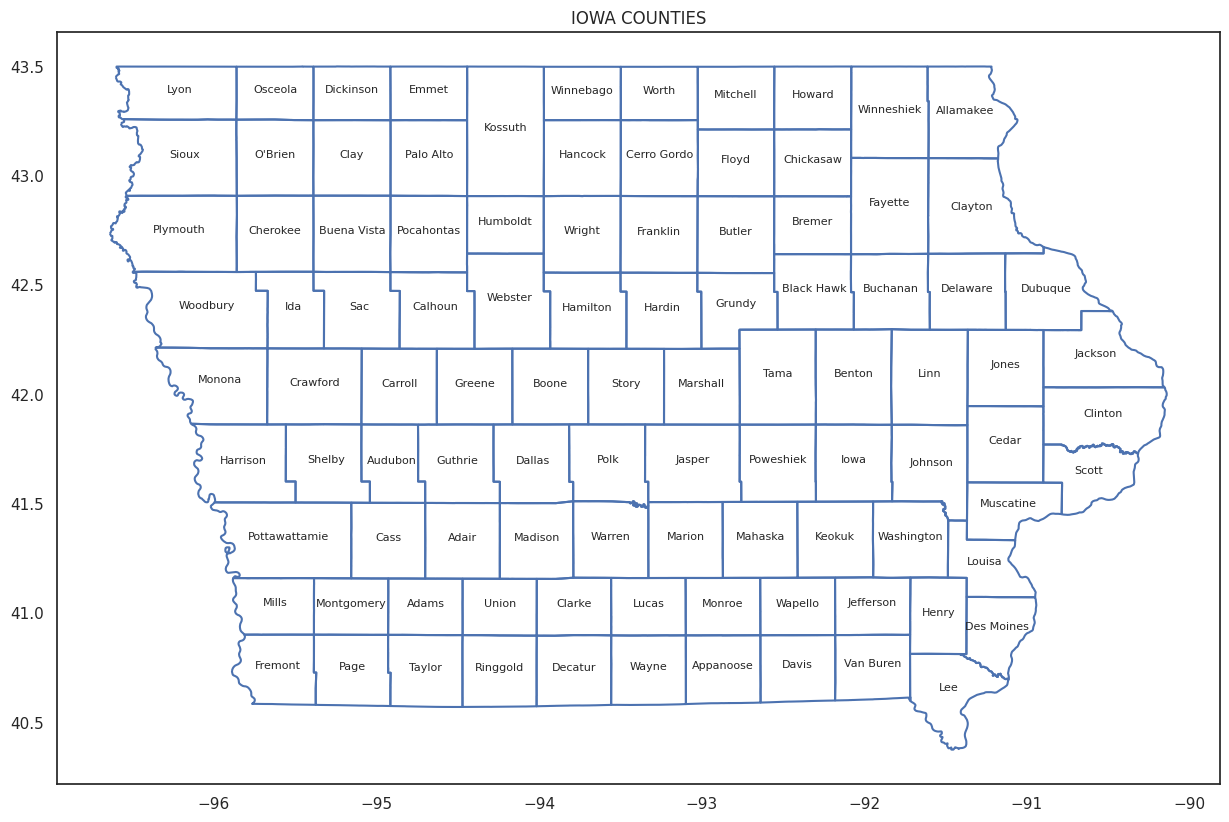

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
iowa_county.boundary.plot(ax=ax)
for idx, row in iowa_county.iterrows():
    # Get the centroid of the polygon
    centroid = row['geometry'].centroid
    # Add the label, here using the 'name' column
    plt.annotate(text=row['NAME'], xy=(centroid.x, centroid.y),
                 horizontalalignment='center', fontsize=8)
ax.set_title("IOWA COUNTIES")


### Crop progress data
*Description*: In response to increasing demand for higher resolution crop progress and condition data which reveal spatiotemporal trends within states, NASS has begun the creation of geospatially referenced, gridded datasets which represent the raw county data in a way that protects farmer confidentiality. The Crop Progress and Condition Layers are gridded geospatial datasets which are fully synthetic representations of confidential, NASS county level survey data. These new data are available for U.S. corn, soybeans, cotton, and winter wheat, at a weekly cadence during the growing season. The current archive of these datasets span growing-season weeks for all years from 2015 to present. All gridded datasets are in the widely used geoTIFF format. The resolution is 9km and uses the NAD 1983 Contiguous USA Albers Projected Coordinate System. The data stored in the pixels is 32-bit float format. These Crop Progress and Condition Layers are snapped to the NASA Soil Moisture Active Passive Satellite data, to facilitate ease of coordinated use between datasets. Please reference <https://www.nass.usda.gov/Research_and_Science/Cropland/Release/index.php> for data downloads and additional technical details.

In [53]:
progress = rio.open(data_dir+'/cpc2015/corn/progress/CornProg15w40.tif')
progress.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 479, 'height': 320, 'count': 1, 'crs': CRS.from_epsg(5070), 'transform': Affine(8999.255456289853, 0.0, -2309800.213402343,
       0.0, -8999.255456289853, 3185470.286793154), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

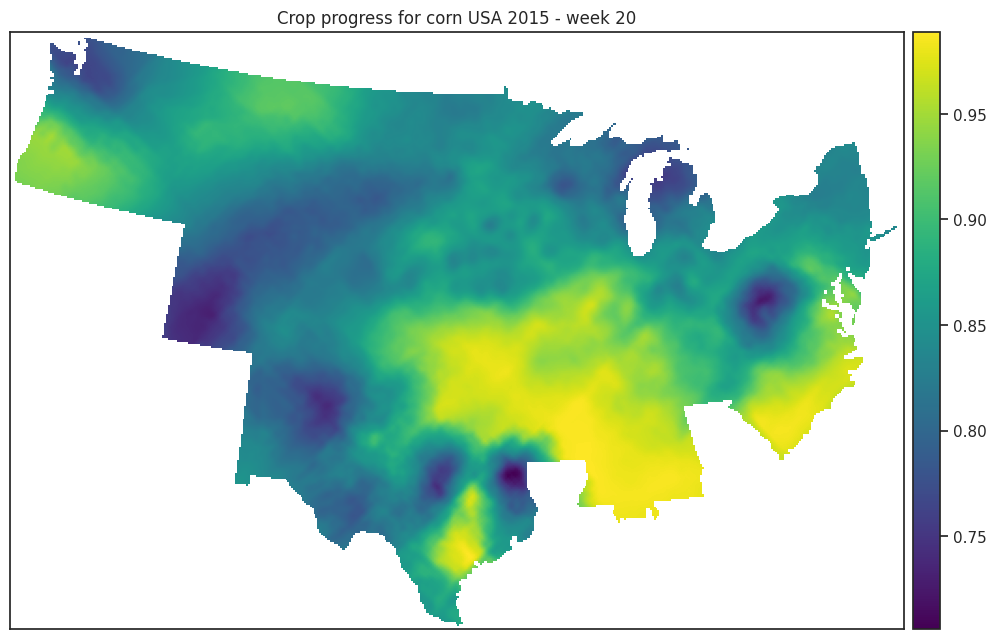

In [54]:
progress_dt = progress.read(1)
progress_masked = np.ma.masked_array(progress_dt, mask=(progress_dt == -9999))
ep.plot_bands(progress_masked,
              title="Crop progress for corn USA 2015 - week 20",
              cmap="viridis")

plt.show()

23